# ANOVA et test de Kruskal-Wallis

Souvent nous allons comparer plus que 2 échantillons indépendants, mais plutôt 3 voire plus. Un exemple géographique classique est de comparer différentes régions entre elles.

Si on part de l'idée que nous avons des échantillons provenant de la même population, nous allons nous attendre à une certaine variabilité dans les différents échantillons. Il est donc tout à fait normal que de valeurs comme la moyenne ou la variance ne soient pas identiques à travers les échantillons. Par contre, si les différences deviennent plus importants que ce que l'on pourrait s'attendre sur la base de la variabilité due à l'échantillonnage, il faut partir de l'idée que les échantillons ne proviennent pas de la même population, mais d'au moins deux populations.

Ceci est la logique derrière les tests de l'ANOVA (ANalysis Of VAriance) et de Kruskal-Wallis. L'ANOVA est un test paramétrique, c'est-à-dire qui est applicable à des variables d'intervalle et de ratio suivant une loi normale. En plus, la variance doit être la même pour tous les échantillons. Le test de Kruskal-Wallis est un test non-paramétrique qui se base sur des variables ordinales (ou variables d'intervalle ou de ratio traitées comme variables ordinales).


## Comparaison de la proportion de jeunes dans les cantons de Fribourg, Genève et Valais avec une ANOVA

Nous voulons évaluer si la moyenne de la proportion de jeunes dans les 3 cantons est la même, ou au contraire s'il y a des différences significatives.

La première étape est la préparation de données. Une façon simple de préparer les données est dans Excel. Nous prenons le fichier [demo.xlsx](../data/stats/demo.xlsx) et supprimons les lignes et colonnes qui ne sont pas utilisées. Nous ajoutons une colonne avec le canton (c'est important pour l'ANOVA!), et nous calculons la proportion de jeunes. Et finalement nous faisons un copier-coller de tout le tableau vers un éditeur de texte pour obtenir un format TSV. Le fichier résultant est [demo-jeunes-fr-ge-vs.tsv](demo-jeunes-fr-ge-vs.tsv).

Il est clair que nous pourrions faire la même opération dans R, mais focalisons sur l'essentiel ici.

Nous pouvons maintenant simplement lire notre fichier:

In [4]:
djeunes = read.csv("demo-jeunes-fr-ge-vs.tsv", sep="\t")

Il est une bonne idée de faire une inspection visuelle des données, avec la fonction [plot()](http://stat.ethz.ch/R-manual/R-devel/library/graphics/html/plot.html):

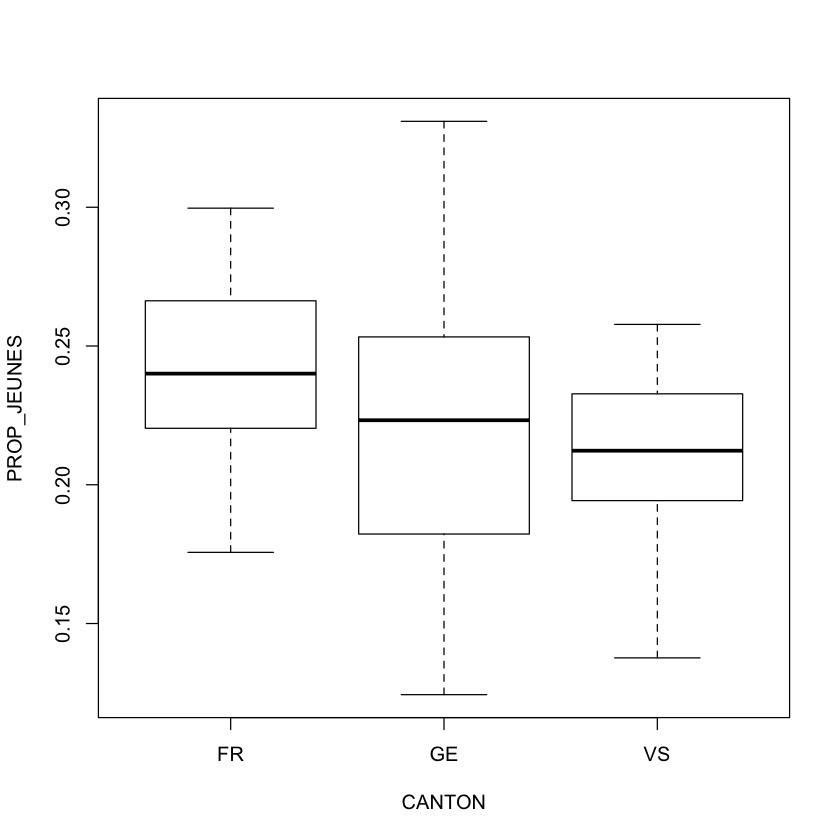

In [6]:
plot(PROP_JEUNES ~ CANTON, data=djeunes)

Pour une ANOVA, les hypothèses à tester sont:

$H_0: \mu_1 = \mu_2 = \dots = \mu_k$  
$H_1: \mu_1 \ne \mu_2 \ne \dots \ne \mu_k$

L'ANOVA calcule une valeur $F$ qui est basée sur la comparaison des moyennes inter-groupes et intra-groupes:

$F = \frac{MS_B}{MS_W}$

où $MS_B$ est la moyenne des carrés des différences inter-groupes,  
et $MS_W$ est la moyenne des carrés des différences intra-groupes.

Si les différences inter-groupes sont grandes, $F$ devient grand aussi et la propobilité que les échantillons provienent de la même population diminue.

Concrètement, dans R, l'ANOVA se calcule de la manière suivante:

In [9]:
anova_jeunes = aov(PROP_JEUNES ~ CANTON, data=djeunes)
summary(anova_jeunes)

             Df  Sum Sq  Mean Sq F value   Pr(>F)    
CANTON        2 0.02463 0.012315   8.383 0.000331 ***
Residuals   179 0.26295 0.001469                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

où la colonne `Pr(>F)` est la p-valeur. Dans ce cas, la valeur de $F$ est relativement grand, et la probabilité de rejeter $H_0$ à tort est très faible. En conséquence, nous acceptons donc $H_1$ pour conclure qu'il y a des différences significatives dans la proportion de jeunes des trois cantons étudiées. L'ANOVA ne va par contre pas nous dire lequel des cantons est différent...

Notez aussi la façon d'utiliser la fonction `aov` dans R:

- Nous donnons d'abord le nom de la colonne avec les valeurs à étudier, et puis un signe `~`, et à la suite la variable catégorielle permettant de séparer les groupes. Une variable catégorielle qui permet de définir les groupes est appelée un __facteur__ (_factor_).

- Nous n'avons pas utilisé la façon d'écrire `djeunes$PROP_JEUNES` que nous avons utilisé auparavant. À la place, nous avons indiqué le nom du jeu de données dans `data=...`. Dans R, nous disons que `djeunes` est un __`data.frame`__. Nous aurions aussi pu écrire, au même titre:

In [10]:
anova_jeunes = aov(djeunes$PROP_JEUNES ~ djeunes$CANTON)
summary(anova_jeunes)

                Df  Sum Sq  Mean Sq F value   Pr(>F)    
djeunes$CANTON   2 0.02463 0.012315   8.383 0.000331 ***
Residuals      179 0.26295 0.001469                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Choisissez la méthode qui vous convient personnellement mieux...

## Comparaison de la proportion de jeunes avec un test de Kruskal-Wallis

L'alternative non-paramétrique à l'ANOVA est le test de Kruskal-Wallis. Les hypothèses à tester sont:

$H_0$: La population d'origine est la même pour tous les $k$ échantillons ($k \ge 3$)  
$H_1$: Les $k$ échantillons proviennent d'au moins deux populations distinctes

Le calcul se fait de manière très similaire à l'ANOVA:

In [12]:
kruskal.test(PROP_JEUNES ~ CANTON, data=djeunes)


	Kruskal-Wallis rank sum test

data:  PROP_JEUNES by CANTON
Kruskal-Wallis chi-squared = 17.118, df = 2, p-value = 0.0001918


avec comme résultat une p-valeur très faible. En conséquence, nous rejettons $H_0$ pour conclure (à nouveau) que la moyenne des proportions de jeunes dans les 3 cantons n'est pas identique.